#**Mobile User's Stats**
### We are going to fetch user_behavior_dataset randomly from the [Kaggle](https://www.kaggle.com/datasets/).
###Then clean it accourding to our use case..
##Steps of Visualization
 1): We will find the top 5 Models with highest screen time and represent it with the [Bar Chart](https://en.wikipedia.org/wiki/Bar_chart).

 2): Then We will find the Highest Engagement by Gender of users and also represent it with the [Bar Chart](https://en.wikipedia.org/wiki/Bar_chart).

 3): Then We will find the highest data usage by Device model and represent it with the [Scatter Chart](https://en.wikipedia.org/wiki/Scatter_plot).

 4): Then We will find the highest data users by Age and represent it with with [Scatter Chart](https://en.wikipedia.org/wiki/Scatter_plot).

 5): Then We will find the Models with higest battary drain and represent it with [Pie Chart](https://en.wikipedia.org/wiki/Pie_chart).



 ##**POS: IF YOU FIND ANY MISTAKES OR INEFFEINCY IN CODE KINDLY CONTRIBUTE** ❤

In [ ]:
# Libraries
!pip install pyspan
import pandas as pd
import pyspan as ps

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 37.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.1.4 which is incompatible.


In [ ]:
# Reading the xlsx file
df = pd.read_excel('user_behavior_dataset.xlsx')
df.head() #printing the head of data frame to check if it's loaded succesfully

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,User ID,Device Model,OS,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Andr,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,11761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


#Cleaning Data As per Need

In [ ]:
#Deleting duplicates
df = df.drop_duplicates()

In [ ]:
# Manually seeig the dataframe
pd.set_option('display.max_rows',None) # setting pandas display to max
print(df) # printing the whole data frame to manually see the inconsistencies.

     User ID        Device Model       OS  App Usage Time (min/day)  \
0          1      Google Pixel 5  Android                       393   
1          2           OnePlus 9     Andr                       268   
2          3        Xiaomi Mi 11  Android                       154   
3          4      Google Pixel 5  Android                       239   
4          5           iPhone 12      iOS                       187   
5          6      Google Pixel 5  Android                        99   
6          7  Samsung Galaxy S21     Andr                       350   
7          8           OnePlus 9     Andr                       543   
8          9  Samsung Galaxy S21     Andr                       340   
9         10           iPhone 12      iOS                       424   
10        11      Google Pixel 5  Android                        53   
11        12           OnePlus 9  Android                       215   
12        13           OnePlus 9  Android                       462   
13    

In [ ]:
df.count()

,0
User ID,700
Device Model,700
OS,700
App Usage Time (min/day),700
Screen On Time (hours/day),700
Battery Drain (mAh/day),700
Number of Apps Installed,700
Data Usage (MB/day),700
Age,700
Gender,700


In [ ]:
# now replacing 'Andr' with "Android" in OS column
df['OS'] = df['OS'].replace(to_replace = 'Andr',value = 'Android')
df.head()

,User ID,Device Model,OS,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,11761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [ ]:
# Removing user of > 90 year
df = df[df['Age'] < 90]
df.count() # only keeping the users whom are less than 90 years

,0
User ID,688
Device Model,688
OS,688
App Usage Time (min/day),688
Screen On Time (hours/day),688
Battery Drain (mAh/day),688
Number of Apps Installed,688
Data Usage (MB/day),688
Age,688
Gender,688


In [ ]:
# Removing the Number of Apps Installed Column as we dont't need that
df = df.drop('Number of Apps Installed',axis= 1)
df.count()

,0
User ID,688
Device Model,688
OS,688
App Usage Time (min/day),688
Screen On Time (hours/day),688
Battery Drain (mAh/day),688
Data Usage (MB/day),688
Age,688
Gender,688
User Behavior Class,688


In [ ]:
# Removing the OnePlus models as we don't need them
df = df[~df['Device Model'].str.contains('OnePlus',case=False,na=False)]
df.count()

,0
User ID,555
Device Model,555
OS,555
App Usage Time (min/day),555
Screen On Time (hours/day),555
Battery Drain (mAh/day),555
Data Usage (MB/day),555
Age,555
Gender,555
User Behavior Class,555


In [ ]:
print(df.dtypes)
# print(df['Screen On Time (hours/day)'].unique())
df['Screen On Time (hours/day)'] = pd.to_numeric(df['Screen On Time (hours/day)'], errors='coerce')

User ID                         int64
Device Model                   object
OS                             object
App Usage Time (min/day)        int64
Screen On Time (hours/day)    float64
Battery Drain (mAh/day)         int64
Data Usage (MB/day)             int64
Age                             int64
Gender                         object
User Behavior Class             int64
dtype: object


#Visualizing Data

<Axes: title={'center': 'Top 5 Devices by Screen Time'}, xlabel='Device Model'>

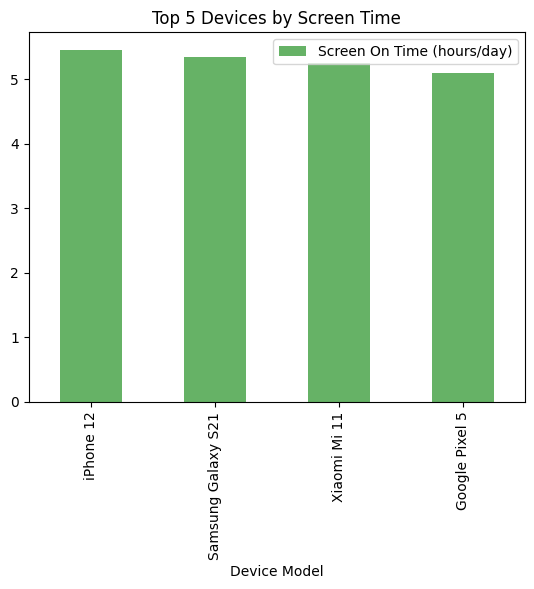

In [ ]:
# Top 5 higest Usages time per models
aggregated_DM_ST = df.groupby('Device Model', as_index=False)['Screen On Time (hours/day)'].mean()
top_5_devices = aggregated_DM_ST.sort_values(by='Screen On Time (hours/day)', ascending=False).head(5)
top_5_devices.plot(x = 'Device Model',y='Screen On Time (hours/day)',kind = 'bar', title = 'Top 5 Devices by Screen Time',color = 'Green',alpha = 0.6)

<Axes: title={'center': 'Engagement by Gender'}, xlabel='Gender'>

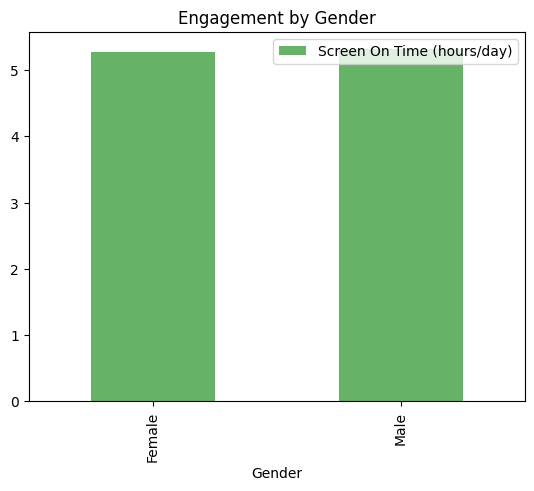

In [ ]:
# Engagement by Gender
aggregated_G_ST = df.groupby('Gender',as_index = False)['Screen On Time (hours/day)'].mean()
aggregated_G_ST.plot(x = 'Gender', y = 'Screen On Time (hours/day)',kind = 'bar',color = 'green',title = 'Engagement by Gender',alpha = 0.6)


<Axes: title={'center': 'Data Usage by Model'}, xlabel='Device Model', ylabel='Data Usage (MB/day)'>

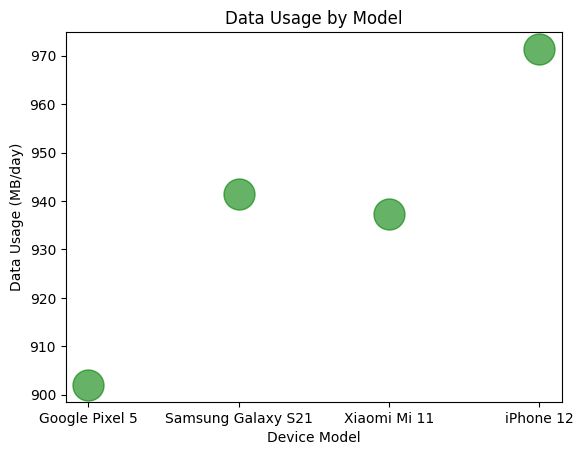

In [ ]:
# Data Usage By Model
aggregated_DM_DU = df.groupby('Device Model',as_index = False)['Data Usage (MB/day)'].mean()
aggregated_DM_DU.plot(x= 'Device Model',y = 'Data Usage (MB/day)',kind = 'scatter',color = 'green',s= 500,alpha = 0.6,title = 'Data Usage by Model')

<Axes: title={'center': 'Data User by Age'}, xlabel='Age', ylabel='Data Usage (MB/day)'>

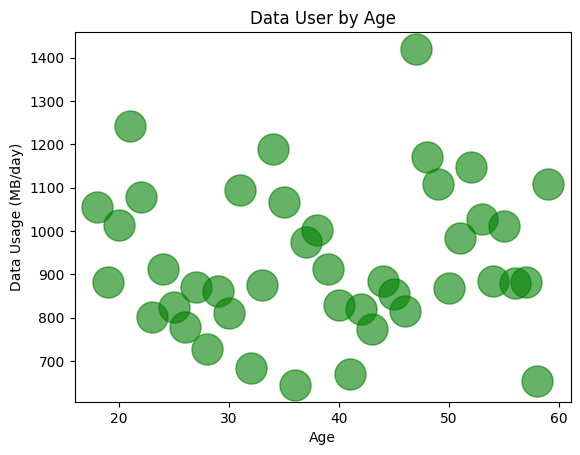

In [ ]:
# Highest Data User by age
aggregated_AG_DU = df.groupby('Age',as_index = False)['Data Usage (MB/day)'].mean()
aggregated_AG_DU.plot(x = 'Age',y = 'Data Usage (MB/day)',kind = 'scatter',color = 'green',s = 500,alpha = 0.6,title = 'Data User by Age')

<Axes: >

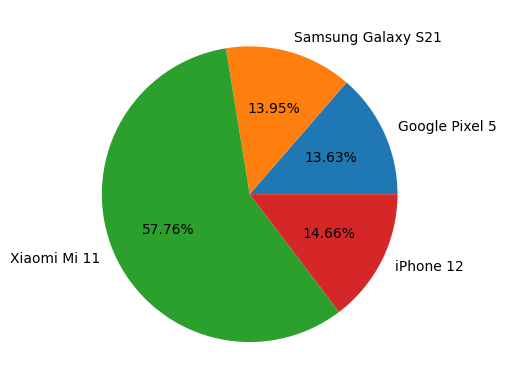

In [ ]:
# Model's Battary drain
aggregated_BD_MD = df.groupby('Device Model')['Battery Drain (mAh/day)'].mean()
aggregated_BD_MD.plot(kind='pie', autopct='%1.2f%%',ylabel = '')